In [1]:
# Importing the required libraries and modules 
import re

import string

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud

from collections import Counter
from collections import OrderedDict

In [2]:
# Function which returns string containing contents of .txt file at file_path
def txt_file_to_string(file_path):  
    with open(file_path, "r", encoding = "utf8") as curr:
        text = curr.read()
        text = text.replace("\n", " ").replace("\r", " ")
    return text

In [3]:
# Book 1 is Pride and Prejudice stored in string T1
book_one_path = "E:/Pride and Prejudice.txt"
Original_T1 = txt_file_to_string(book_one_path)
Original_T1

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: Pride and Prejudice  Author: Jane Austen  Release Date: June, 1998 [eBook #1342] [Most recently updated: August 23, 2021]  Language: English  Character set encoding: UTF-8  Produced by: Anonymous Volunteers and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***     THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [# 42671 ]  cover     Pride and Prejudice  By Jane Austen  CONTENTS    Chapter 1    Chapter 2    Chapter 3    Chap

In [4]:
# Book 2 is The Adventures of Sherlock Holmes stored in string T2
book_two_path = "E:/The Adventures of Sherlock Holmes.txt"
Original_T2 = txt_file_to_string(book_two_path)
Original_T2

'The Project Gutenberg eBook of The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Adventures of Sherlock Holmes  Author: Arthur Conan Doyle  Release Date: November 29, 2002 [eBook #1661] [Most recently updated: May 20, 2019]  Language: English  Character set encoding: UTF-8  Produced by: an anonymous Project Gutenberg volunteer and Jose Menendez  *** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***  cover     The Adventures of Sherlock Holmes  by Arthur Conan Doyle   Contents     I.     A Scandal in Bohemi

In [5]:
#Function to do basic pre-processing on the text
def pre_process(str):
    
    # Removing prefix and suffix to narrow down to text from Book
    start_index = str.find('*** START OF THE PROJECT ')
    end_index = str.find('*** END OF THE PROJECT ')
    str = str[start_index:end_index]
    
    # Converting entire string to lowercase
    str = str.lower()

    # Expanding some Contractions
    str = re.sub(r"won\'t", "will not", str)
    str = re.sub(r"can\'t", "can not", str)

    # Expanding more Contractions according to general assumption
    str = re.sub(r"n\'t", " not", str)
    str = re.sub(r"\'re", " are", str)
    str = re.sub(r"\'s", " is", str)
    str = re.sub(r"\'d", " would", str)
    str = re.sub(r"\'ll", " will", str)
    str = re.sub(r"\'t", " not", str)
    str = re.sub(r"\'ve", " have", str)
    str = re.sub(r"\'m", " am", str)
    
    # Removing all punctuations by replacing everyhting other than whitespace characters, a-z, A-Z, 0-9 and '_' by empty string 
    # followed by replacing '_' by empty string
    str = re.sub(r"[^\w\s]", "", str)
    str = re.sub(r"_", "", str)

    #Removing chapter number headings if any
    str = re.sub(r"chapter [0-9]{1,3}", "", str)

    # Replacing one or more continuous whitespace characters by space
    str = re.sub(r"[\s]+", " ", str)
    
    return str

In [6]:
# Pre-processing T1
T1 = pre_process(Original_T1)
T1

' start of the project gutenberg ebook pride and prejudice there is an illustrated edition of this title which may viewed at ebook 42671 cover pride and prejudice by jane austen contents it is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife however little known the feelings or views of such a man may be on his first entering a neighbourhood this truth is so well fixed in the minds of the surrounding families that he is considered as the rightful property of some one or other of their daughters my dear mr bennet said his lady to him one day have you heard that netherfield park is let at last mr bennet replied that he had not but it is returned she for mrs long has just been here and she told me all about it mr bennet made no answer do not you want to know who has taken it cried his wife impatiently you want to tell me and i have no objection to hearing it this was invitation enough why my dear you must know mrs long says that 

In [7]:
# Tokenizing and lemmatizing T1
lemmatizer = WordNetLemmatizer()
Tokenized_T1 = word_tokenize(T1)
Final_T1 = [lemmatizer.lemmatize(i) for i in Tokenized_T1] 
Final_T1

['start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'and',
 'prejudice',
 'there',
 'is',
 'an',
 'illustrated',
 'edition',
 'of',
 'this',
 'title',
 'which',
 'may',
 'viewed',
 'at',
 'ebook',
 '42671',
 'cover',
 'pride',
 'and',
 'prejudice',
 'by',
 'jane',
 'austen',
 'content',
 'it',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a',
 'single',
 'man',
 'in',
 'possession',
 'of',
 'a',
 'good',
 'fortune',
 'must',
 'be',
 'in',
 'want',
 'of',
 'a',
 'wife',
 'however',
 'little',
 'known',
 'the',
 'feeling',
 'or',
 'view',
 'of',
 'such',
 'a',
 'man',
 'may',
 'be',
 'on',
 'his',
 'first',
 'entering',
 'a',
 'neighbourhood',
 'this',
 'truth',
 'is',
 'so',
 'well',
 'fixed',
 'in',
 'the',
 'mind',
 'of',
 'the',
 'surrounding',
 'family',
 'that',
 'he',
 'is',
 'considered',
 'a',
 'the',
 'rightful',
 'property',
 'of',
 'some',
 'one',
 'or',
 'other',
 'of',
 'their',
 'daughter',
 'my',
 'dear',
 'mr',
 'bennet',
 'said',

In [8]:
# Pre-processing T2
T2 = pre_process(Original_T2)
T2

' start of the project gutenberg ebook the adventures of sherlock holmes cover the adventures of sherlock holmes by arthur conan doyle contents i a scandal in bohemia ii the redheaded league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineers thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii the adventure of the copper beeches i a scandal in bohemia i to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he w

In [9]:
# Tokenizing T2
Tokenized_T2 = word_tokenize(T2)
Final_T2 = [lemmatizer.lemmatize(i) for i in Tokenized_T2] 
Final_T2

['start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventure',
 'of',
 'sherlock',
 'holmes',
 'cover',
 'the',
 'adventure',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'content',
 'i',
 'a',
 'scandal',
 'in',
 'bohemia',
 'ii',
 'the',
 'redheaded',
 'league',
 'iii',
 'a',
 'case',
 'of',
 'identity',
 'iv',
 'the',
 'boscombe',
 'valley',
 'mystery',
 'v',
 'the',
 'five',
 'orange',
 'pip',
 'vi',
 'the',
 'man',
 'with',
 'the',
 'twisted',
 'lip',
 'vii',
 'the',
 'adventure',
 'of',
 'the',
 'blue',
 'carbuncle',
 'viii',
 'the',
 'adventure',
 'of',
 'the',
 'speckled',
 'band',
 'ix',
 'the',
 'adventure',
 'of',
 'the',
 'engineer',
 'thumb',
 'x',
 'the',
 'adventure',
 'of',
 'the',
 'noble',
 'bachelor',
 'xi',
 'the',
 'adventure',
 'of',
 'the',
 'beryl',
 'coronet',
 'xii',
 'the',
 'adventure',
 'of',
 'the',
 'copper',
 'beech',
 'i',
 'a',
 'scandal',
 'in',
 'bohemia',
 'i',
 'to',
 'sherlock',
 'holmes',
 'she',
 'is'

In [10]:
# Finding frequency of tokens in T1
T1_frequency_distribution = FreqDist(Final_T1)
T1_frequency_distribution_org = T1_frequency_distribution
T1_frequency_distribution

FreqDist({'the': 4325, 'to': 4127, 'of': 3601, 'and': 3529, 'a': 3120, 'her': 2216, 'i': 2051, 'in': 1861, 'wa': 1844, 'she': 1703, ...})

In [11]:
# Finding frequency of tokens in T2
T2_frequency_distribution = FreqDist(Final_T2)
T2_frequency_distribution_org = T2_frequency_distribution
T2_frequency_distribution

FreqDist({'the': 5622, 'a': 3474, 'and': 2999, 'i': 2994, 'to': 2681, 'of': 2655, 'it': 1811, 'in': 1758, 'that': 1735, 'he': 1476, ...})

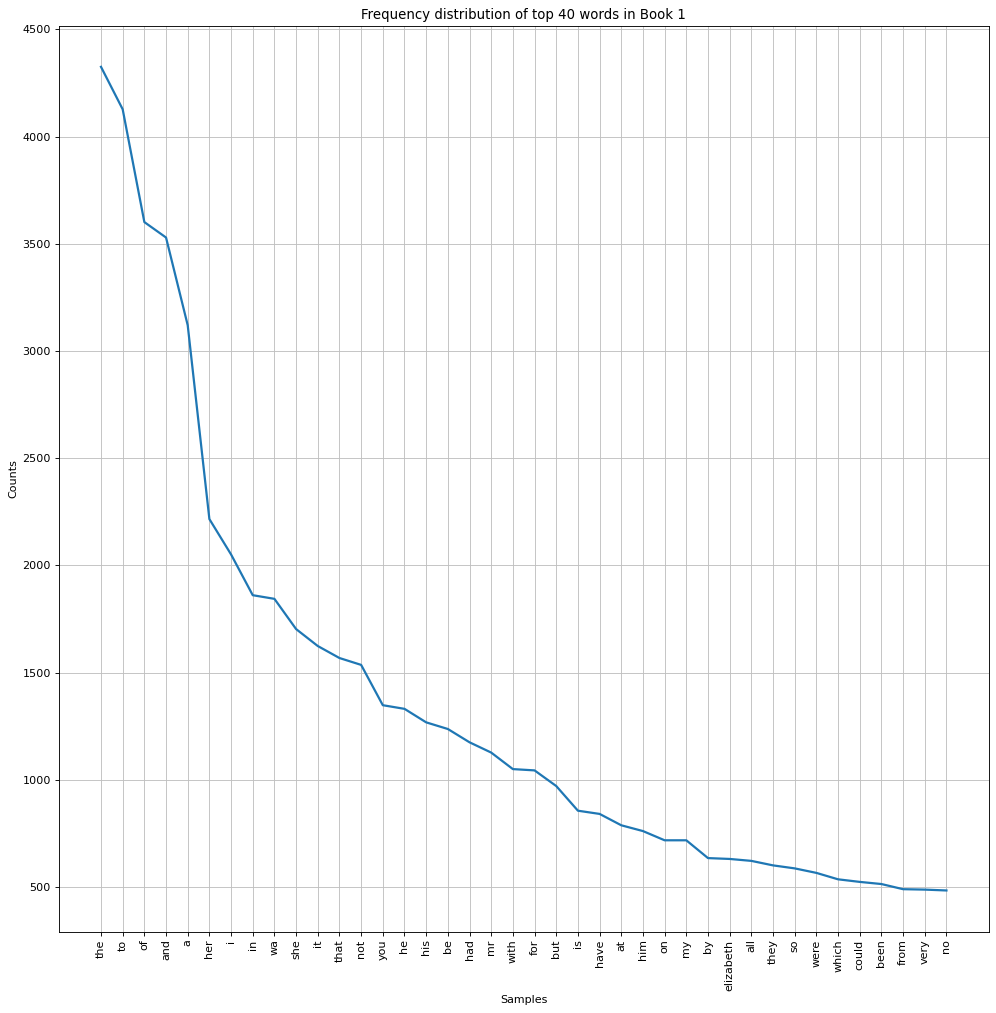

In [12]:
# Plotting the frequency distribution plot of the top 40 most frequent words for Book 1
figure(figsize=(15, 15), dpi = 80)
freq_graph = T1_frequency_distribution.plot(40, title = "Frequency distribution of top 40 words in Book 1")

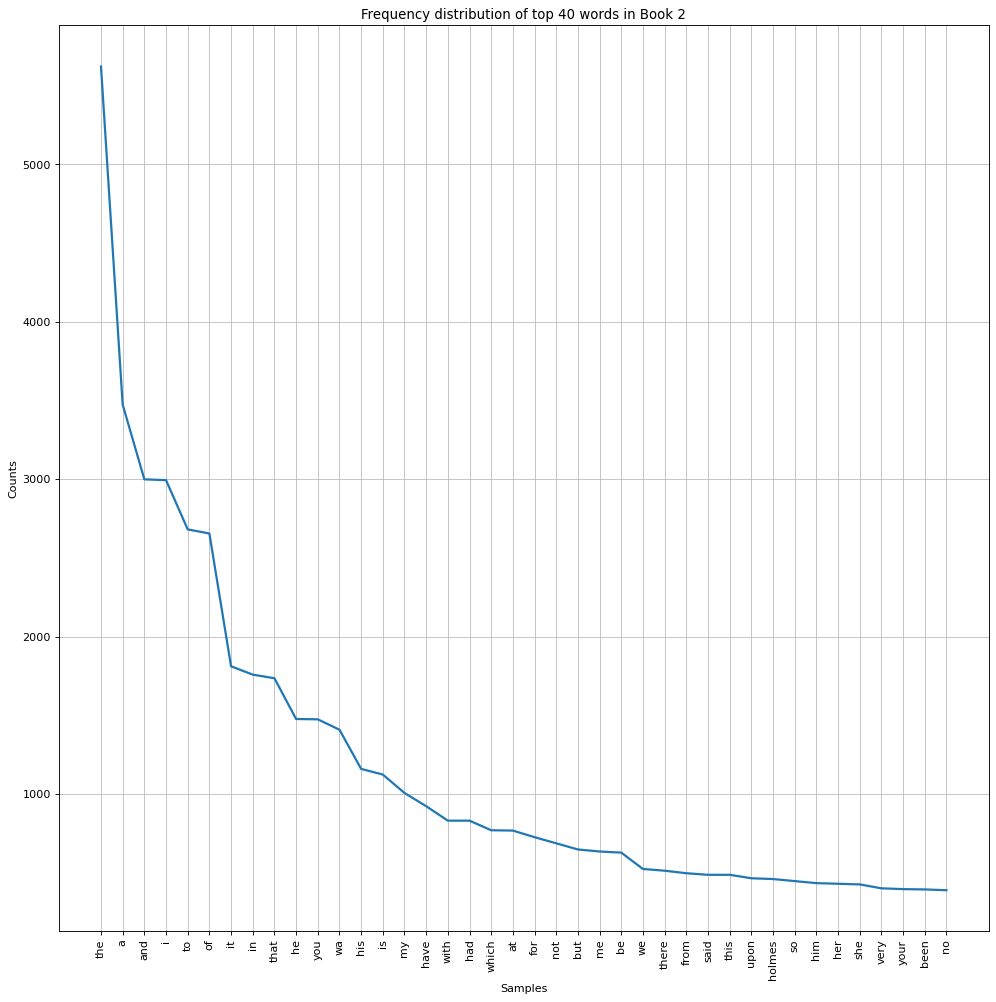

In [13]:
# Plotting the frequency distribution plot of the top 40 most frequent words for Book 2
figure(figsize=(15, 15), dpi = 80)
freq_graph = T2_frequency_distribution.plot(40, title = "Frequency distribution of top 40 words in Book 2")

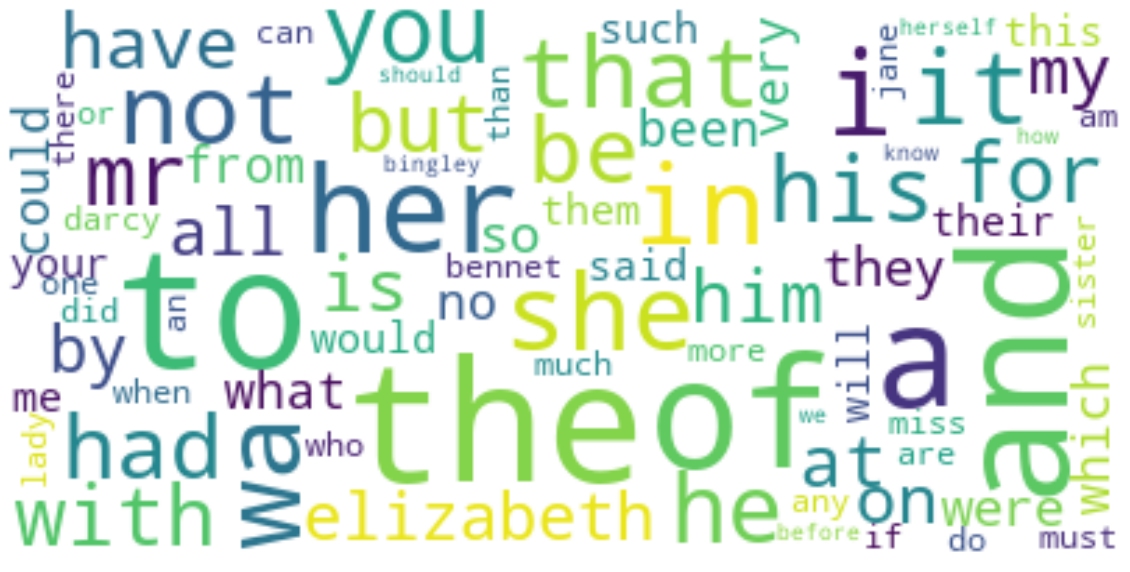

In [14]:
# Creating Word Cloud for Book 1
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

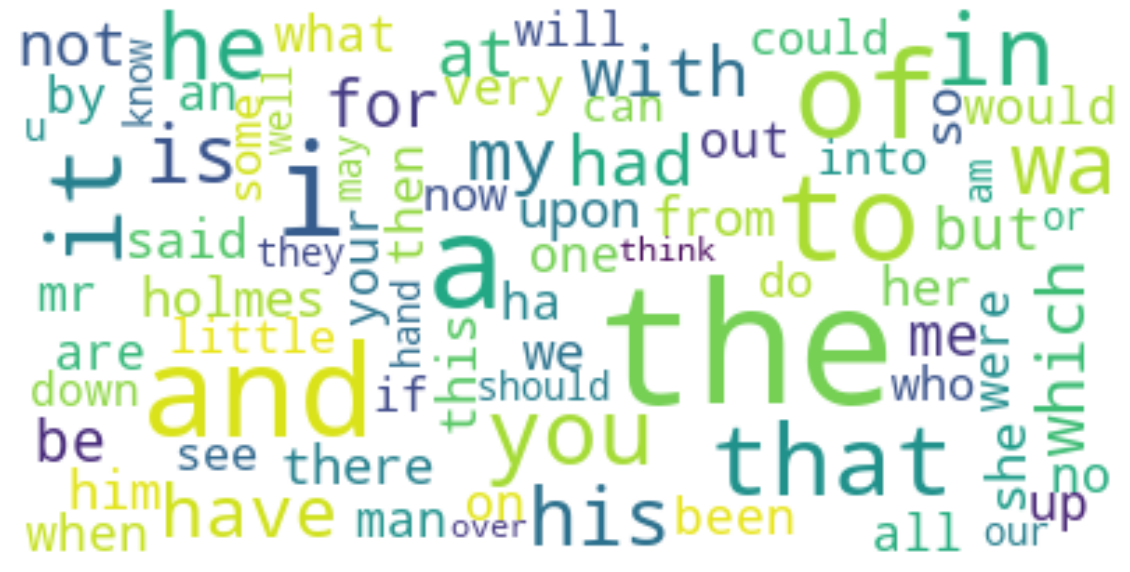

In [15]:
# Creating Word Cloud for Book 2
dictionary = Counter(T2_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
# Removing stopwords from T1
remove_these = set(stopwords.words('english'))
Cleaned_T1 = [w for w in Final_T1 if not w in remove_these]
Cleaned_T1

['start',
 'project',
 'gutenberg',
 'ebook',
 'pride',
 'prejudice',
 'illustrated',
 'edition',
 'title',
 'may',
 'viewed',
 'ebook',
 '42671',
 'cover',
 'pride',
 'prejudice',
 'jane',
 'austen',
 'content',
 'truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however',
 'little',
 'known',
 'feeling',
 'view',
 'man',
 'may',
 'first',
 'entering',
 'neighbourhood',
 'truth',
 'well',
 'fixed',
 'mind',
 'surrounding',
 'family',
 'considered',
 'rightful',
 'property',
 'one',
 'daughter',
 'dear',
 'mr',
 'bennet',
 'said',
 'lady',
 'one',
 'day',
 'heard',
 'netherfield',
 'park',
 'let',
 'last',
 'mr',
 'bennet',
 'replied',
 'returned',
 'mr',
 'long',
 'ha',
 'told',
 'mr',
 'bennet',
 'made',
 'answer',
 'want',
 'know',
 'ha',
 'taken',
 'cried',
 'wife',
 'impatiently',
 'want',
 'tell',
 'objection',
 'hearing',
 'wa',
 'invitation',
 'enough',
 'dear',
 'must',
 'know',
 'mr',
 'long',
 'say',


In [17]:
# Updating frequency distribution of T1 after removal of stop words
T1_frequency_distribution = FreqDist(Cleaned_T1)
T1_frequency_distribution

FreqDist({'wa': 1844, 'mr': 1127, 'elizabeth': 631, 'could': 524, 'would': 468, 'said': 402, 'darcy': 371, 'bennet': 333, 'much': 327, 'must': 308, ...})

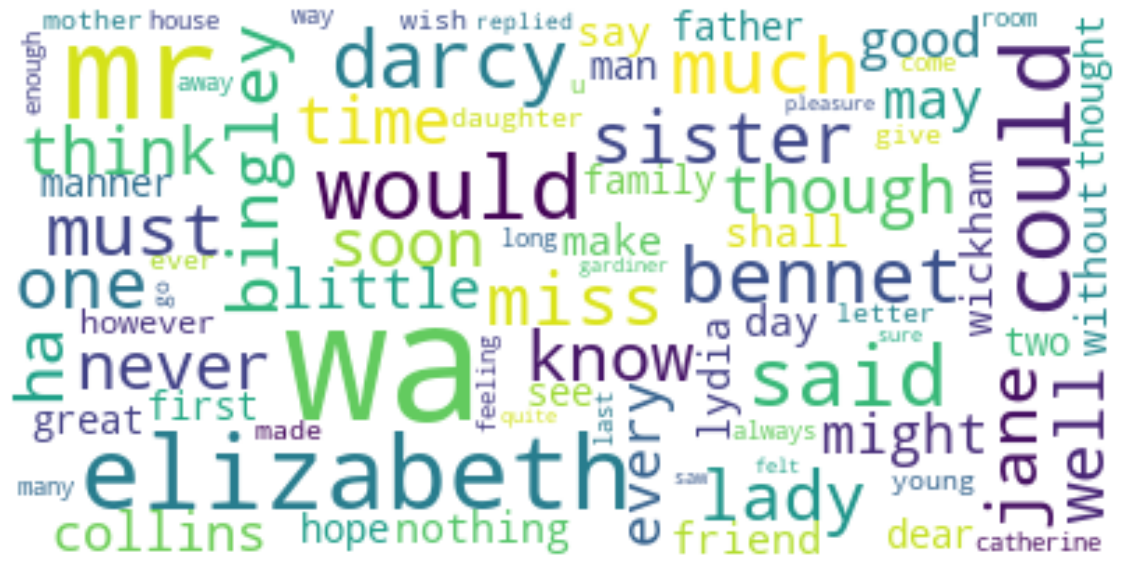

In [18]:
# Creating word cloud from the updated frequency distribution
dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plt.figure(figsize = (20, 20))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Removing stopwords from T2
remove_these = set(stopwords.words('english'))
Cleaned_T2 = [w for w in Final_T2 if not w in remove_these]
Cleaned_T2

['start',
 'project',
 'gutenberg',
 'ebook',
 'adventure',
 'sherlock',
 'holmes',
 'cover',
 'adventure',
 'sherlock',
 'holmes',
 'arthur',
 'conan',
 'doyle',
 'content',
 'scandal',
 'bohemia',
 'ii',
 'redheaded',
 'league',
 'iii',
 'case',
 'identity',
 'iv',
 'boscombe',
 'valley',
 'mystery',
 'v',
 'five',
 'orange',
 'pip',
 'vi',
 'man',
 'twisted',
 'lip',
 'vii',
 'adventure',
 'blue',
 'carbuncle',
 'viii',
 'adventure',
 'speckled',
 'band',
 'ix',
 'adventure',
 'engineer',
 'thumb',
 'x',
 'adventure',
 'noble',
 'bachelor',
 'xi',
 'adventure',
 'beryl',
 'coronet',
 'xii',
 'adventure',
 'copper',
 'beech',
 'scandal',
 'bohemia',
 'sherlock',
 'holmes',
 'always',
 'woman',
 'seldom',
 'heard',
 'mention',
 'name',
 'eye',
 'eclipse',
 'predominates',
 'whole',
 'sex',
 'wa',
 'felt',
 'emotion',
 'akin',
 'love',
 'irene',
 'adler',
 'emotion',
 'one',
 'particularly',
 'abhorrent',
 'cold',
 'precise',
 'admirably',
 'balanced',
 'mind',
 'wa',
 'take',
 'perfec

In [20]:
# Updating frequency distribution of T2 after removal of stop words
T2_frequency_distribution = FreqDist(Cleaned_T2)
T2_frequency_distribution

FreqDist({'wa': 1408, 'said': 486, 'upon': 464, 'holmes': 459, 'one': 380, 'would': 327, 'mr': 318, 'ha': 305, 'man': 302, 'could': 286, ...})

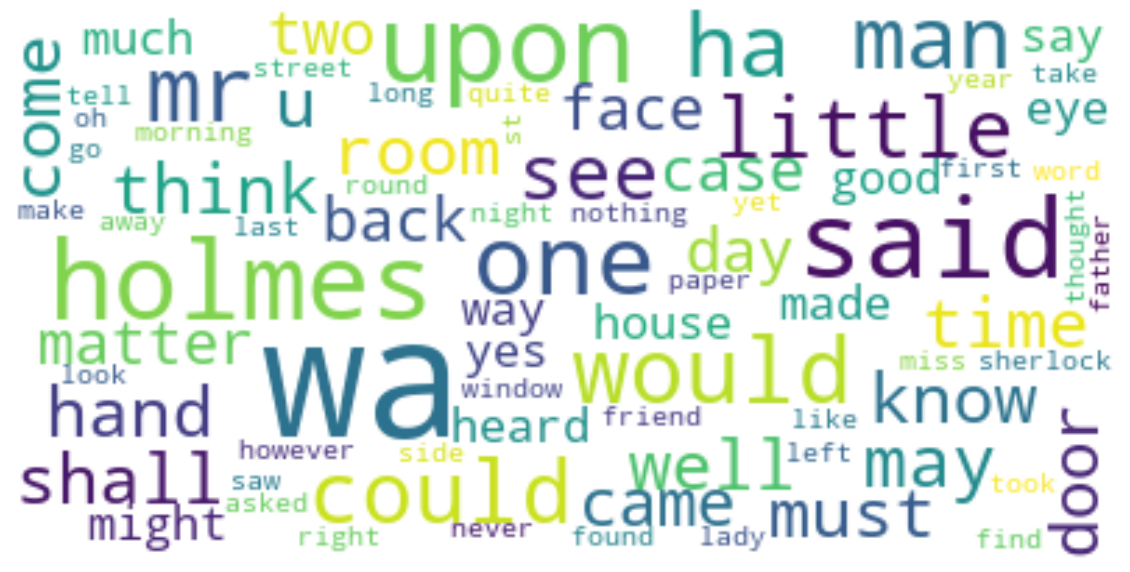

In [21]:
# Creating word cloud from the updated frequency distribution
dictionary = Counter(T2_frequency_distribution)
cloud = WordCloud(max_font_size=60, max_words=80, background_color="white").generate_from_frequencies(dictionary)
plt.figure(figsize=(20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# Counting frequency of words in T1 on the basis of word length
length_frequency_T1 = {}
for i, j in T1_frequency_distribution_org.items():
    x = len(i)
    if(x in length_frequency_T1):
        length_frequency_T1[x] += j
    else:
        length_frequency_T1[x] = j
length_frequency_T1 = OrderedDict(sorted(length_frequency_T1.items()))
length_frequency_T1

OrderedDict([(1, 5310),
             (2, 24555),
             (3, 26142),
             (4, 22143),
             (5, 11425),
             (6, 9034),
             (7, 8052),
             (8, 4983),
             (9, 4885),
             (10, 2324),
             (11, 1302),
             (12, 861),
             (13, 367),
             (14, 140),
             (15, 26),
             (16, 13),
             (17, 7),
             (18, 2),
             (19, 2),
             (20, 1),
             (21, 1),
             (23, 1),
             (26, 1)])

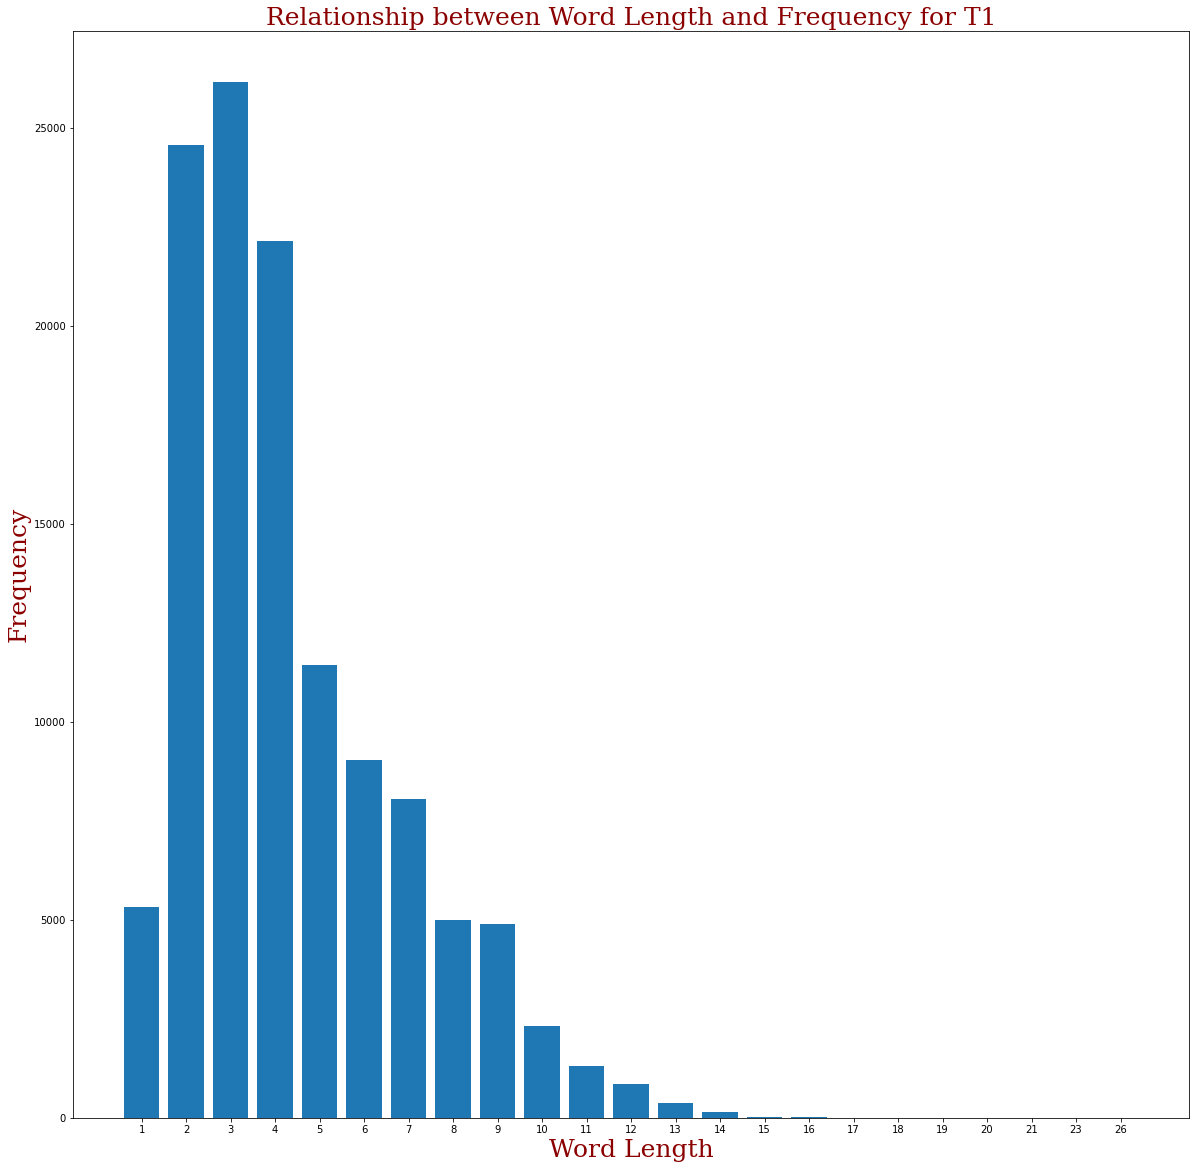

In [23]:
# Plotting word length vs Frequency graph
plt.figure(figsize = (20, 20))

plt.bar(range(len(length_frequency_T1)), list(length_frequency_T1.values()), align = 'center')

plt.xticks(range(len(length_frequency_T1)), list(length_frequency_T1.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Relationship between Word Length and Frequency for T1", fontdict = font, loc = "center")
plt.xlabel("Word Length", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [24]:
# Counting frequency of words in T2 on the basis of word length
length_frequency_T2 = {}
for i, j in T2_frequency_distribution_org.items():
    x = len(i)
    if(x in length_frequency_T2):
        length_frequency_T2[x] += j
    else:
        length_frequency_T2[x] = j
length_frequency_T2 = OrderedDict(sorted(length_frequency_T2.items()))
length_frequency_T2

OrderedDict([(1, 6725),
             (2, 20669),
             (3, 22524),
             (4, 20812),
             (5, 10742),
             (6, 8204),
             (7, 5798),
             (8, 3881),
             (9, 2389),
             (10, 1360),
             (11, 699),
             (12, 409),
             (13, 209),
             (14, 71),
             (15, 14),
             (16, 7),
             (17, 7),
             (18, 3),
             (19, 1)])

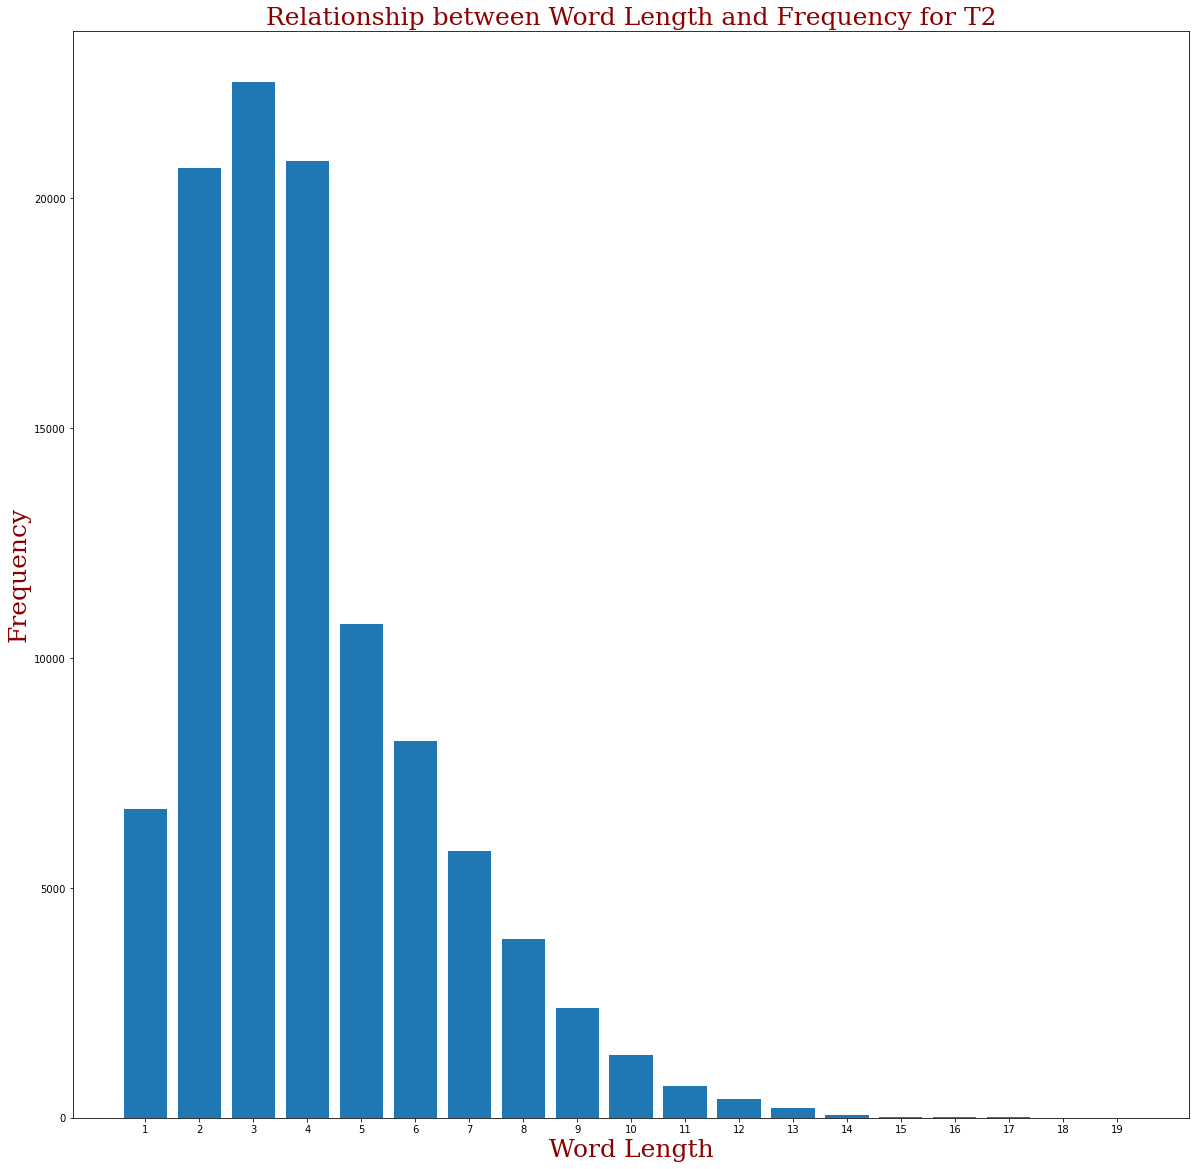

In [25]:
# Plotting word length vs Frequency graph
plt.figure(figsize = (20, 20))

plt.bar(range(len(length_frequency_T2)), list(length_frequency_T2.values()), align = 'center')

plt.xticks(range(len(length_frequency_T2)), list(length_frequency_T2.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Relationship between Word Length and Frequency for T2", fontdict = font, loc = "center")
plt.xlabel("Word Length", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [26]:
# Preprocessing original text to include only content of Ebook
start_index = Original_T1.find('*** START OF THE PROJECT ')
end_index = Original_T1.find('*** END OF THE PROJECT ')
Original_T1 = Original_T1[start_index:end_index]

# Doing PoS tagging for T1 (using Penn Treebank Tagset) and obtaining distribution of tags for it 
words= [word_tokenize(i) for i in sent_tokenize(Original_T1)]
pos_tag= [nltk.pos_tag(i) for i in words]

tag_frequency_distribution = {}
for sent in pos_tag:
    for word, tag in sent:
        if tag in tag_frequency_distribution:
            tag_frequency_distribution[tag] += 1
        else:
            tag_frequency_distribution[tag] = 1
tag_frequency_distribution = OrderedDict(sorted(tag_frequency_distribution.items(), key=lambda item: item[1], reverse = True))
print(tag_frequency_distribution)

OrderedDict([('NN', 16798), ('IN', 15176), ('PRP', 11200), ('DT', 9147), (',', 9146), ('NNP', 8701), ('RB', 8637), ('VBD', 8061), ('JJ', 7883), ('VB', 6418), ('.', 5035), ('CC', 4965), ('PRP$', 4745), ('TO', 4124), ('VBN', 3640), ('NNS', 3000), ('MD', 2843), ('VBP', 2434), ('VBG', 2168), (':', 1668), ('VBZ', 1665), ('WP', 839), ('WRB', 743), ('WDT', 703), ('CD', 670), ('JJR', 375), ('JJS', 332), ('RP', 308), ('PDT', 288), ('EX', 286), ('RBR', 258), ('RBS', 141), ('UH', 95), ('FW', 87), ('WP$', 59), ("''", 51), ('(', 18), (')', 18), ('NNPS', 11), ('POS', 2), ('#', 1)])


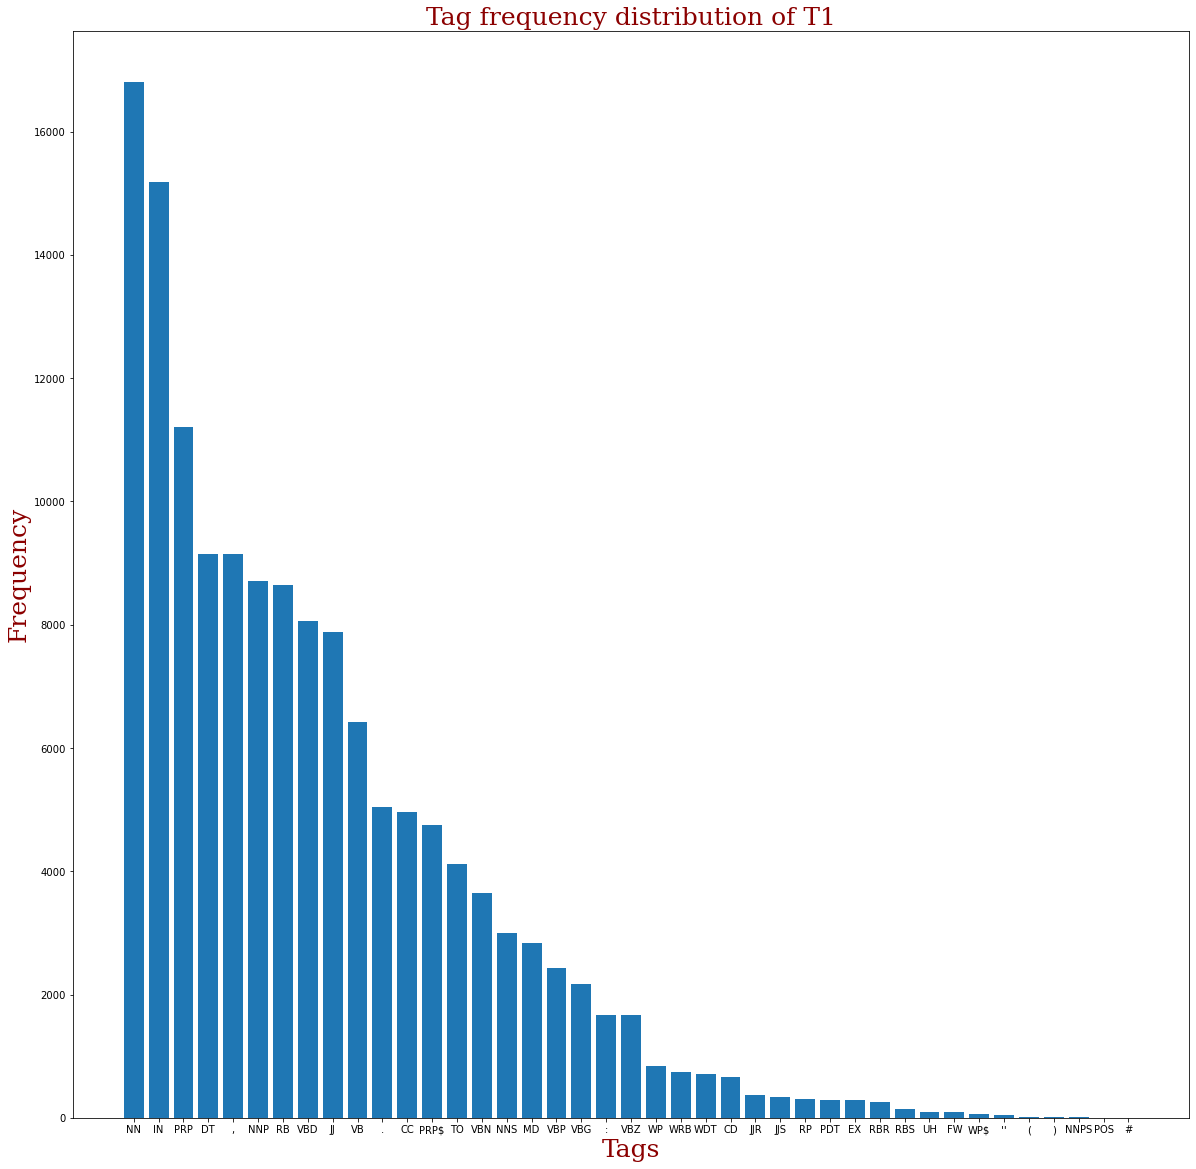

In [27]:
# Plotting tag frequency distribution of T1
plt.figure(figsize = (20, 20))

plt.bar(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.values()), align = 'center')

plt.xticks(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Tag frequency distribution of T1", fontdict = font, loc = "center")
plt.xlabel("Tags", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()

In [28]:
# Preprocessing original text to include only content of Ebook
start_index = Original_T2.find('*** START OF THE PROJECT ')
end_index = Original_T2.find('*** END OF THE PROJECT ')
Original_T2 = Original_T2[start_index:end_index]

# Doing PoS tagging for T2 (using Penn Treebank Tagset) and obtaining distribution of tags for it 
words= [word_tokenize(i) for i in sent_tokenize(Original_T2)]
pos_tag= [nltk.pos_tag(i) for i in words]

tag_frequency_distribution = {}
for sent in pos_tag:
    for word, tag in sent:
        if tag in tag_frequency_distribution:
            tag_frequency_distribution[tag] += 1
        else:
            tag_frequency_distribution[tag] = 1
tag_frequency_distribution = OrderedDict(sorted(tag_frequency_distribution.items(), key=lambda item: item[1], reverse = True))
print(tag_frequency_distribution)

OrderedDict([('NN', 16552), ('IN', 13317), ('DT', 10620), ('PRP', 10476), (',', 7651), ('JJ', 7464), ('NNP', 7289), ('VBD', 6887), ('RB', 6172), ('.', 5492), ('VB', 4317), ('CC', 3965), ('PRP$', 3234), ('NNS', 2877), ('VBN', 2696), ('TO', 2677), ('VBP', 2521), ('VBZ', 2100), ('MD', 1957), ('VBG', 1458), ('WDT', 880), ('CD', 818), ('WP', 690), ('RP', 683), ('WRB', 633), ('EX', 408), (':', 250), ('JJR', 200), ('RBR', 153), ('JJS', 151), ('PDT', 149), ('UH', 115), ("''", 101), ('RBS', 82), ('FW', 46), ('WP$', 21), ('NNPS', 13), ('$', 10), ('(', 5), (')', 5), ('POS', 2)])


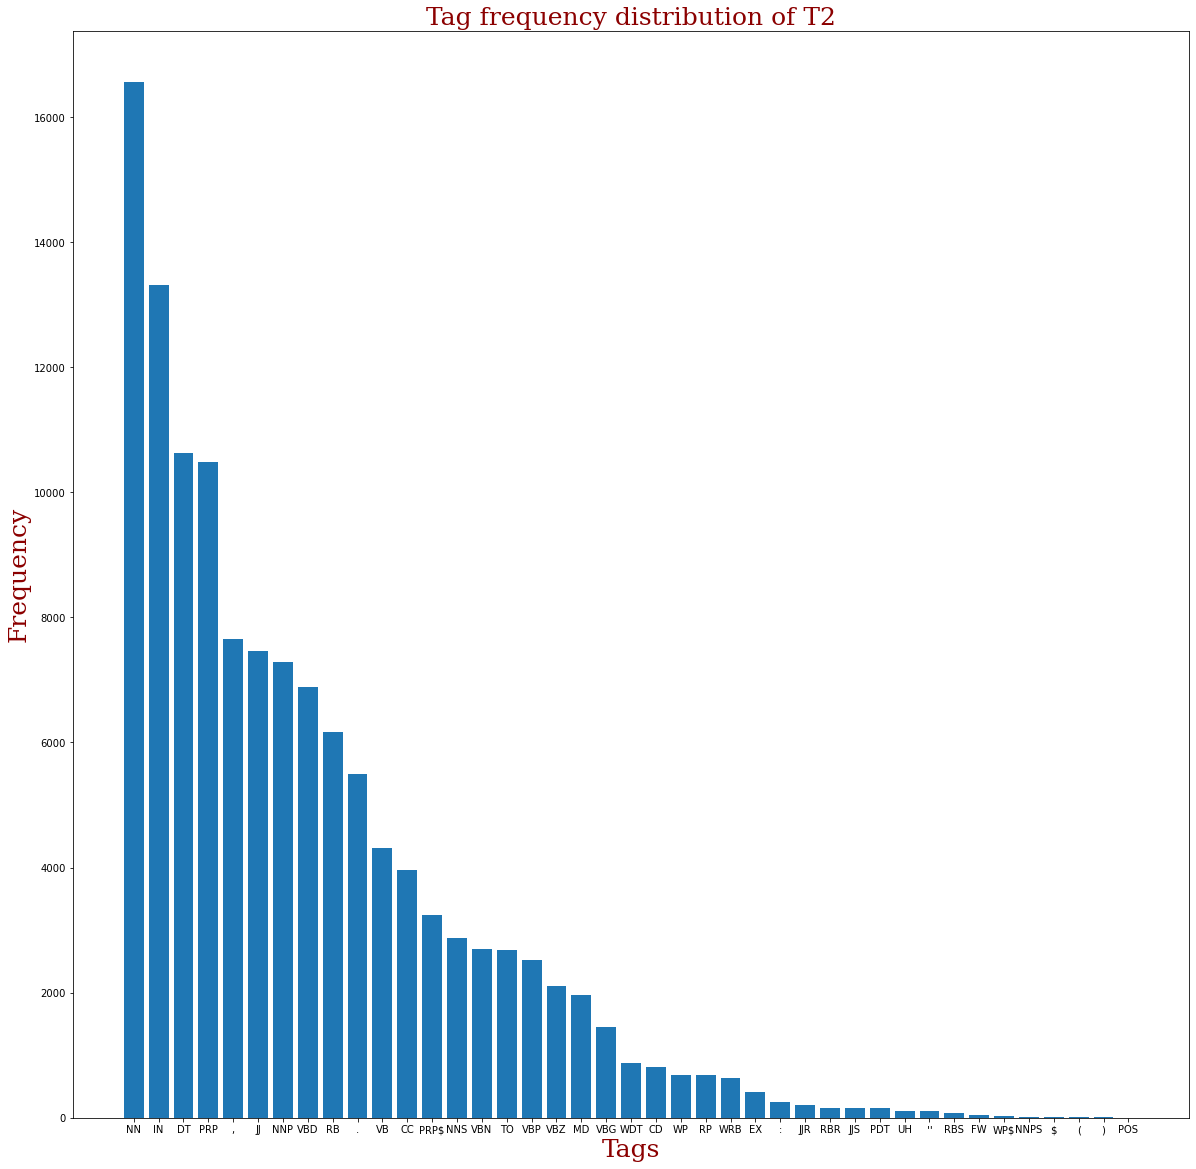

In [29]:
# Plotting tag frequency distribution of T2
plt.figure(figsize = (20, 20))

plt.bar(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.values()), align = 'center')

plt.xticks(range(len(tag_frequency_distribution)), list(tag_frequency_distribution.keys()))
font = {'family':'serif','color':'darkred','size':25}

plt.title("Tag frequency distribution of T2", fontdict = font, loc = "center")
plt.xlabel("Tags", fontdict = font)
plt.ylabel("Frequency", fontdict = font)

plt.show()